In [1]:
import pandas as pd
import os
df = pd.read_csv('pmp_takehome_2019.csv')

In [2]:
## check first rows
df.head()

,Location number,Month,State,Gross revenue,Fixed cost,Variable cost,Rental cost,Number of products,Owned
0,1,1,TX,48628171.02,9218156.69,24278189.23,365880,4452,False
1,1,2,TX,48107179.24,10587747.35,25116844.41,365880,4452,False
2,1,3,TX,64352278.29,10193873.77,33703499.83,365880,4452,False
3,1,4,TX,45943677.96,8764165.00,24037719.47,365880,4452,False
4,1,5,TX,32761434.98,8022116.43,16432119.18,365880,4452,False


In [3]:
## check datatypes
df.dtypes

Location number         int64
Month                   int64
State                  object
Gross revenue         float64
Fixed cost            float64
Variable cost         float64
Rental cost             int64
Number of products      int64
Owned                    bool
dtype: object

In [4]:
## check for null values - none, good
df.isnull().sum()

Location number       0
Month                 0
State                 0
Gross revenue         0
Fixed cost            0
Variable cost         0
Rental cost           0
Number of products    0
Owned                 0
dtype: int64

In order to find out the Profit Margin, need to first calculate Total Cost from Fixed and Variable Costs. 

VERY IMPORTANT: Rental Cost is *not* included in Fixed or Variable costs

In [5]:
df['Total cost'] = df['Fixed cost'] + df['Variable cost'] + df['Rental cost'];
df['Total cost'].head(3)

0    33862225.92
1    36070471.76
2    44263253.60
Name: Total cost, dtype: float64

Net profit is the money left over after paying all the expenses

https://en.wikipedia.org/wiki/Net_income

In [6]:
df['Net profit'] = df['Gross revenue'] - df['Total cost']
df['Net profit'].head(3)

0    14765945.10
1    12036707.48
2    20089024.69
Name: Net profit, dtype: float64

Profit margin is calculated by finding the net profit as a percentage of the revenue

https://en.wikipedia.org/wiki/Profit_margin

In [7]:
df['Profit margin'] = df['Net profit'] / df['Gross revenue']
df['Profit margin'].head()

0    0.303650
1    0.250206
2    0.312173
3    0.278078
4    0.242398
Name: Profit margin, dtype: float64

In [8]:
## to make revenue and profit easier to read/interpret in table/visuals
df['Revenue in millions'] = df['Gross revenue'] / 1000000
df['Profit in millions'] = df['Net profit'] / 1000000
df.head(2)

,Location number,Month,State,Gross revenue,Fixed cost,Variable cost,Rental cost,Number of products,Owned,Total cost,Net profit,Profit margin,Revenue in millions,Profit in millions
0,1,1,TX,48628171.02,9218156.69,24278189.23,365880,4452,False,33862225.92,14765945.10,0.303650,48.628171,14.765945
1,1,2,TX,48107179.24,10587747.35,25116844.41,365880,4452,False,36070471.76,12036707.48,0.250206,48.107179,12.036707


### To get the annual profit margin, need to find annual profit and annual revenue of each store

#### easier to do that with a new df where each row is a store. cols aggregate revenue and profit

In [9]:
stores_group = df.groupby('Location number')
stores_df = pd.DataFrame()
stores_df['Annual revenue'] = stores_group['Gross revenue'].sum()
stores_df['Annual profit'] = stores_group['Net profit'].sum()

## switch from scinotation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

stores_df.head(2)

,Annual revenue,Annual profit
Location number,,
1,544738868.63,150084018.05
2,355973012.71,88586723.97


In [10]:
stores_df.tail(2)

,Annual revenue,Annual profit
Location number,,
332,343263906.49,106096703.68
333,663919160.86,181921507.46


In [11]:
stores_df['Annual profit margin'] = stores_df['Annual profit'] / stores_df['Annual revenue']
stores_df.head(2)

,Annual revenue,Annual profit,Annual profit margin
Location number,,,
1,544738868.63,150084018.05,0.28
2,355973012.71,88586723.97,0.25


In [12]:
## make easier to read - revenue in billions, profit in millions
stores_df['Annual revenue in millions'] = stores_df['Annual revenue'] / 1000000
stores_df['Annual profit in millions'] = stores_df['Annual profit'] / 1000000
stores_df.head(2)

,Annual revenue,Annual profit,Annual profit margin,Annual revenue in millions,Annual profit in millions
Location number,,,,,
1,544738868.63,150084018.05,0.28,544.74,150.08
2,355973012.71,88586723.97,0.25,355.97,88.59


# Part 1 - summary stats & plots

### Q1: What is the mean & median annual profit margin of a 'typical' store location?

In [13]:
## 
stores_df.describe()

,Annual revenue,Annual profit,Annual profit margin,Annual revenue in millions,Annual profit in millions
count,333.00,333.00,333.00,333.00,333.00
mean,361101760.79,95453449.83,0.25,361.10,95.45
std,188441065.87,63726267.92,0.06,188.44,63.73
min,78200484.08,-869941.77,-0.01,78.20,-0.87
25%,238805690.01,52502781.11,0.21,238.81,52.50
50%,319380364.45,81611260.13,0.26,319.38,81.61
75%,431326319.47,121161857.26,0.29,431.33,121.16
max,1200481359.57,378628316.56,0.40,1200.48,378.63


In [14]:
stores_df[stores_df['Annual revenue'] == stores_df['Annual revenue'].median()]

,Annual revenue,Annual profit,Annual profit margin,Annual revenue in millions,Annual profit in millions
Location number,,,,,
296,319380364.45,72534272.05,0.23,319.38,72.53


In [15]:
## view the spread of the data
bplot = stores_df[['Annual revenue in millions', 'Annual profit in millions']].plot(kind='box')
bplot.plot()

[]

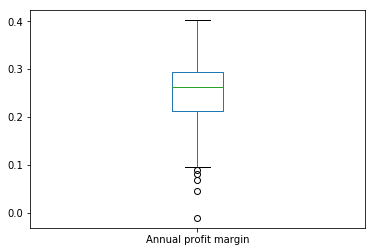

In [16]:
bplot2 = stores_df[['Annual profit margin']].plot(kind='box')

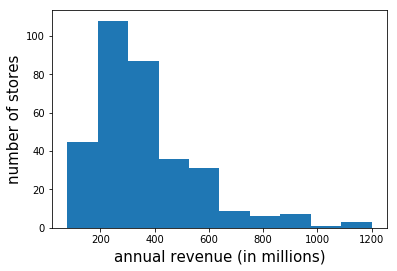

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(stores_df['Annual revenue in millions'])

plt.xlabel('annual revenue (in millions)',fontsize=15)
plt.ylabel('number of stores',fontsize=15)

plt.show()

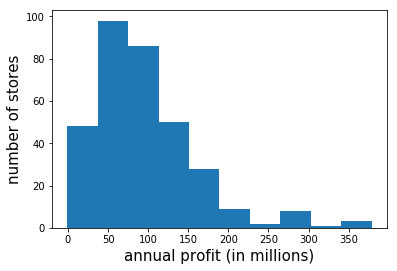

In [18]:
plt.hist(stores_df['Annual profit in millions'])

plt.xlabel('annual profit (in millions)',fontsize=15)
plt.ylabel('number of stores',fontsize=15)

plt.show()

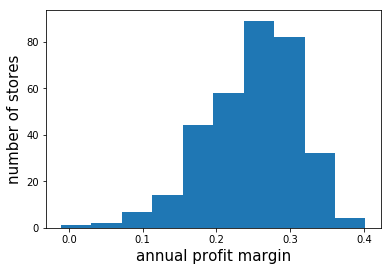

In [19]:
plt.hist(stores_df['Annual profit margin'])

plt.xlabel('annual profit margin',fontsize=15)
plt.ylabel('number of stores',fontsize=15)

plt.show()

In [20]:
## normality test - does not pass

from scipy import stats
stats.normaltest(stores_df['Annual profit margin'])

NormaltestResult(statistic=31.747208377157122, pvalue=1.2769717598778503e-07)

The annual profit margin does not appear to be normally distributed

## Plotting monthly and quarterly revenue across all stores

In [21]:
## group by month, how does revenue change?

## change 1-12 to jan-dec
#import calendar
#df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])

monthly_rev = df.groupby('Month')['Gross revenue'].sum()
monthly_rev_in_billions = monthly_rev / 1000000000

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

monthly_rev_in_billions.index = months
monthly_rev_in_billions

Jan    9.30
Feb    9.79
Mar   11.59
Apr    9.11
May    9.35
Jun   11.30
Jul    9.01
Aug    9.63
Sep   11.25
Oct    9.41
Nov    8.98
Dec   11.54
Name: Gross revenue, dtype: float64

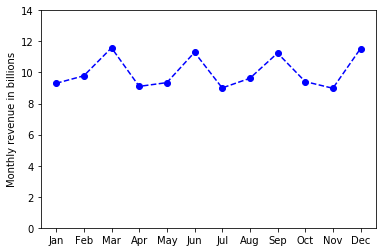

In [22]:
import matplotlib.pyplot as plt
plt.plot(monthly_rev_in_billions, linestyle='--', marker='o', color='b')
plt.ylabel('Monthly revenue in billions')
plt.ylim(top=14,bottom=0)
plt.show()

In [23]:
## same but quarterly - so create a col indicating the quarter
import math
df['Quarter'] = (df['Month'] - 1)//3 + 1
print(df['Quarter'].head())
print(df['Quarter'].tail())

0    1
1    1
2    1
3    2
4    2
Name: Quarter, dtype: int64
3991    3
3992    3
3993    4
3994    4
3995    4
Name: Quarter, dtype: int64


In [24]:
qtr_rev = df.groupby('Quarter')['Gross revenue'].sum()
qtr_rev_in_billions = qtr_rev / 1000000000

quarters = ['Q1', 'Q2', 'Q3', 'Q4']

qtr_rev_in_billions.index = quarters
qtr_rev_in_billions

Q1   30.68
Q2   29.75
Q3   29.88
Q4   29.94
Name: Gross revenue, dtype: float64

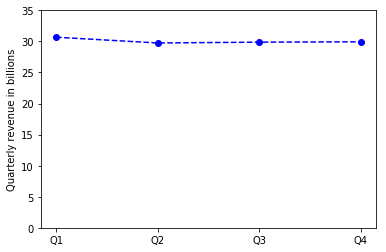

In [25]:
plt.plot(qtr_rev_in_billions, linestyle='--', marker='o', color='b')
plt.ylabel('Quarterly revenue in billions')
plt.ylim(top=35, bottom=0)
plt.show()

## Part 2 - data cleaning
Some stores are leased, some stores are owned

leased stores have higher cost

Impute an 'appropriate' rental cost for each owned location

rent-adjusted annual profit margin

In [26]:
## how many stores have a low or non-existant rental cost?
(df['Rental cost'].value_counts().sort_index() / 12).head()

0       36.00
3420     1.00
5200     1.00
13080    1.00
18290    1.00
Name: Rental cost, dtype: float64

In [27]:
## take these 36 stores with no rental cost, create a new 'assumed rent' col
## insert the median rental cost of all stores with a rental cost

## get median rent of all locations w/ leases
med_rent = df[df['Rental cost'] > 0]['Rental cost'].median()
med_rent

140590.0

In [28]:
df['ownership adjustment'] = 0
df.loc[df['Rental cost'] == 0, 'ownership adjustment'] = med_rent
df['ownership adjustment'].value_counts()

0.00         3564
140590.00     432
Name: ownership adjustment, dtype: int64

In [29]:
df['Rent-adjusted net profit'] = df['Net profit'] - df['ownership adjustment']
df['Rent-adjusted profit margin'] = df['Rent-adjusted net profit'] / df['Gross revenue']
df['Rent-adjusted profit in millions'] = df['Rent-adjusted net profit'] / 1000000

df[df['ownership adjustment'] > 0].head(2)

,Location number,Month,State,Gross revenue,Fixed cost,Variable cost,Rental cost,Number of products,Owned,Total cost,Net profit,Profit margin,Revenue in millions,Profit in millions,Quarter,ownership adjustment,Rent-adjusted net profit,Rent-adjusted profit margin,Rent-adjusted profit in millions
24,3,1,IL,30791018.69,6123108.00,17948338.14,0,4620,True,24071446.14,6719572.55,0.22,30.79,6.72,1,140590.00,6578982.55,0.21,6.58
25,3,2,IL,23805331.16,5014361.53,13051817.38,0,4620,True,18066178.91,5739152.25,0.24,23.81,5.74,1,140590.00,5598562.25,0.24,5.60


In [30]:
## what is the rental cost per state? 
df.groupby('State')['Rental cost'].median()

State
CA    131360
CO    130370
GA    131070
IL    117970
NJ    137525
TX    133890
WA    151555
Name: Rental cost, dtype: int64

In [31]:
## do WA and IL have enough samples/stores to adjust for?
df.groupby('State')['State'].count() / 12

State
CA    63.00
CO    15.00
GA    54.00
IL    54.00
NJ    32.00
TX   101.00
WA    14.00
Name: State, dtype: float64

In [32]:
## 118k, 130-137k, 151k - values are similar enough to apply 1 scalar adjustment figure
## 360K (30K * 12) is not large enough to significantly impact annual profits
## which are in range of 10-100M
stores_df['Annual profit in millions'].value_counts().sort_index().head(3)

-0.87    1
9.69     1
9.92     1
Name: Annual profit in millions, dtype: int64

In [33]:
## rent-adjusted annual profit margin
stores_df['Rent-adjusted annual profit'] = df.groupby('Location number')['Rent-adjusted net profit'].sum()
stores_df['Rent-adjusted annual profit in millions'] = stores_df['Rent-adjusted annual profit'] / 1000000
stores_df['Rent-adjusted annual profit margin'] = stores_df['Rent-adjusted annual profit'] / stores_df['Annual revenue']
stores_df.head(3)

,Annual revenue,Annual profit,Annual profit margin,Annual revenue in millions,Annual profit in millions,Rent-adjusted annual profit,Rent-adjusted annual profit in millions,Rent-adjusted annual profit margin
Location number,,,,,,,,
1,544738868.63,150084018.05,0.28,544.74,150.08,150084018.05,150.08,0.28
2,355973012.71,88586723.97,0.25,355.97,88.59,88586723.97,88.59,0.25
3,331771805.46,82646179.91,0.25,331.77,82.65,80959099.91,80.96,0.24


Can see that store 3 had an rent-adjustment from .25 to .24 profit margin

## Part 3 - id factors that led to higher performace

Maximize profit margin at *each location*.

Write an e-mail describing findings, create 2 slides to walk through analysis

In [34]:
## look at correlations between the profit margin and potential factors
df.corr()['Rent-adjusted profit margin'].sort_values(ascending=False)

Rent-adjusted profit margin        1.00
Profit margin                      1.00
Profit in millions                 0.66
Net profit                         0.66
Rent-adjusted net profit           0.66
Rent-adjusted profit in millions   0.66
Number of products                 0.63
Gross revenue                      0.46
Revenue in millions                0.46
Variable cost                      0.36
Total cost                         0.33
Fixed cost                         0.22
ownership adjustment               0.15
Owned                              0.15
Location number                    0.07
Rental cost                        0.06
Month                              0.02
Quarter                            0.01
Name: Rent-adjusted profit margin, dtype: float64

Other than factors used to calculate profit margin, the factor with the highest correlation (.66) is 'Number of products'
State is not included, would need to add dummy variable to see the correlation

In [35]:
dummyCols=pd.get_dummies(df['State'])
if 'CA' not in df.columns:
    df = df.join(dummyCols)
df.ix[:2,-8:]

/Users/wainman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,Rent-adjusted profit in millions,CA,CO,GA,IL,NJ,TX,WA
0,14.77,0,0,0,0,0,1,0
1,12.04,0,0,0,0,0,1,0
2,20.09,0,0,0,0,0,1,0


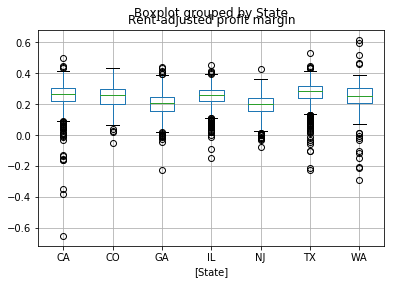

In [36]:
df[['State', 
    'Rent-adjusted profit margin']].boxplot(by='State')

In [37]:
## look at correlations between the profit margin and these new state cols
df.corr()['Rent-adjusted profit margin'].sort_values(ascending=False)


Rent-adjusted profit margin         1.00
Profit margin                       1.00
Profit in millions                  0.66
Net profit                          0.66
Rent-adjusted net profit            0.66
Rent-adjusted profit in millions    0.66
Number of products                  0.63
Gross revenue                       0.46
Revenue in millions                 0.46
Variable cost                       0.36
Total cost                          0.33
TX                                  0.25
Fixed cost                          0.22
ownership adjustment                0.15
Owned                               0.15
Location number                     0.07
Rental cost                         0.06
CA                                  0.05
Month                               0.02
IL                                  0.02
CO                                  0.02
Quarter                             0.01
WA                                 -0.00
NJ                                 -0.21
GA              

TX, GA, NJ have some correlation with profit margin, but less than variable cost.
Much less than 'Number of products'.
Short of advising potentially pricy relocations, should focus on maximizing profit margin of each store where it is.

In [38]:
## are these states correlated w/ profit margin
## because they happen to have a lot of products?
df.corr()['Number of products'].sort_values(ascending=False)

Number of products                  1.00
Profit margin                       0.63
Rent-adjusted profit margin         0.63
Net profit                          0.54
Profit in millions                  0.54
Rent-adjusted net profit            0.54
Rent-adjusted profit in millions    0.54
Gross revenue                       0.45
Revenue in millions                 0.45
ownership adjustment                0.42
Owned                               0.42
Variable cost                       0.40
Total cost                          0.38
Fixed cost                          0.32
IL                                  0.08
Location number                     0.03
CO                                  0.02
TX                                  0.01
Quarter                             0.00
Month                               0.00
GA                                 -0.01
NJ                                 -0.03
CA                                 -0.04
WA                                 -0.06
Rental cost     

In [39]:
## not the case. what might TX be correlated to?
df.corr()['TX'].sort_values(ascending=False)

TX                                  1.00
Rent-adjusted profit margin         0.25
Profit margin                       0.25
Rent-adjusted profit in millions    0.21
Rent-adjusted net profit            0.21
Net profit                          0.21
Profit in millions                  0.21
Revenue in millions                 0.14
Gross revenue                       0.14
Variable cost                       0.10
Total cost                          0.10
Fixed cost                          0.09
Location number                     0.08
Rental cost                         0.07
Number of products                  0.01
Owned                               0.00
ownership adjustment                0.00
Quarter                             0.00
Month                              -0.00
WA                                 -0.14
CO                                 -0.14
NJ                                 -0.22
GA                                 -0.29
IL                                 -0.29
CA              

Very weak correlation with other non-dummy factors.

Going to start with 1 predictor, build from there if necessary

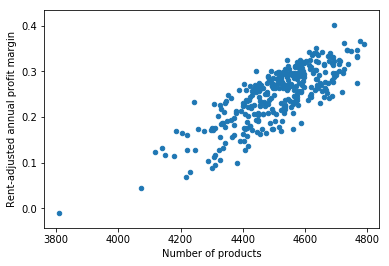

In [40]:
## plot 'num of products' to profit margin
## make sure stores_df is the only source for factors and target variable 
stores_df['Number of products'] = df.groupby('Location number')['Number of products'].mean()
#print(stores_df['Number of products'].dtype)

stores_df.plot.scatter(x='Number of products',
                y='Rent-adjusted annual profit margin')

Looks like a strong linear relationship

The TX profit margin is significantly higher than the NJ one. State may be worth factoring in

In [41]:
X=stores_df[['Number of products']]
y=stores_df[['Rent-adjusted annual profit margin']]

print(X.shape)
print(y.shape)

(333, 1)
(333, 1)


In [42]:
from sklearn.model_selection import train_test_split

# 35& of the 322 stores go into the testing bucket
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.35,
                                                    random_state=99)
## create and train model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)

In [43]:
## create table showing real target data, predicted target data, baseline guess
display = y_test.copy()
if 'actual' not in display.columns:
    display.rename({'Rent-adjusted annual profit margin':'actual'}, axis=1, inplace=True)
display['predicted'] = y_pred
display['baseline prediction'] = display['actual'].median()
display.head(3)

,actual,predicted,baseline prediction
Location number,,,
331,0.26,0.29,0.26
47,0.16,0.20,0.26
270,0.24,0.24,0.26


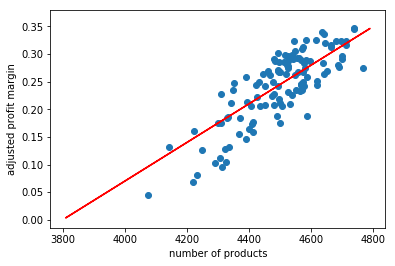

In [44]:
## visualize the fit of our model
## real pts
plt.scatter(X_test, display['actual'])
## line of fit
plt.plot(X_train, lm.predict(X_train), color='red')
plt.ylabel('adjusted profit margin')
plt.xlabel('number of products')
plt.show()

We can see that the model guesses too high of a profit for stores with few (<4350) products.

This is because of the one extreme outlier (3800 products, 0 profit) in the training set. It is the only data point beyond 3.25 standard deviations from the mean number of products. (It's 5.2 standard deviations away). It can be dropped to improve the fit (without worry of overfitting).

In [45]:
X['zscore'] = stats.zscore(X)
X['zscore'].sort_values().head(4)

/Users/wainman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Location number
157   -5.19
313   -3.23
318   -2.91
291   -2.74
Name: zscore, dtype: float64

In [46]:
##remove that col that helped id outlier
X = X.drop(columns='zscore')

## drop outlier
from scipy import stats

stores_df = stores_df.drop(157, axis=0)
X = stores_df[['Number of products']].copy()
y = stores_df[['Rent-adjusted annual profit margin']].copy()

print(X.shape, y.shape)

(332, 1) (332, 1)


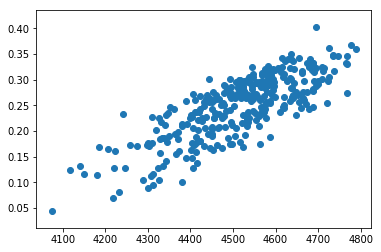

In [47]:
plt.scatter(X,y)

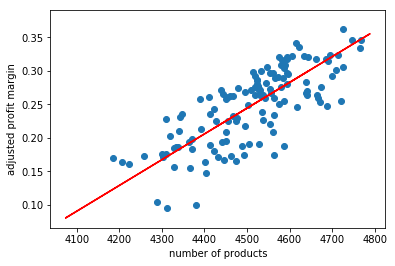

In [48]:
## fit model better
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.4,
                                                    random_state=4)
## create and train model
from sklearn.linear_model import LinearRegression
mod = LinearRegression()
mod.fit(X_train,y_train)
y_pred = mod.predict(X_test)

##plot
plt.scatter(X_test, y_test)
## line of fit
plt.plot(X_train, mod.predict(X_train), color='red')
plt.ylabel('adjusted profit margin')
plt.xlabel('number of products')
plt.show()

### Establish Basline Metrics for model(s) to have to beat
Naive guess: for every store in the test set, guess the profit margin to be the median. 

What metric do we look at to evaluate model, and how does this baseline guess perform compared to the model?

In [49]:
display = y_test.copy()
if 'actual' not in display.columns:
    display.rename({'Rent-adjusted annual profit margin':'actual'}, axis=1, inplace=True)
display['predicted'] = y_pred
display['baseline prediction'] = display['actual'].median()
display['baseline prediction'].head(2)

Location number
197   0.26
124   0.26
Name: baseline prediction, dtype: float64

In [50]:
from sklearn.metrics import mean_absolute_error
baseline_mae = mean_absolute_error(display['actual'],
                                   display['baseline prediction'])
model_mae = mean_absolute_error(display['actual'],
                                   display['predicted'])
print('baseline:', baseline_mae, '\nmodel:   ', model_mae)

baseline: 0.04556862895291817 
model:    0.03003786540855488


In [51]:
model_mae / display['actual'].median()

0.11544893913893503

So the model does reduce the Mean Average Error.

The Mean Average Error is 11.5% of a naive guess. Ok, not great

In [52]:
import numpy as np
print("Mean squared error:",
    np.mean((mod.predict(X) - y ** 2)))
print('R²:',mod.score(X, y))

Mean squared error: Rent-adjusted annual profit margin   0.18
dtype: float64
R²: 0.6255599022691998


R2 was only marginally better than the first model.

To summarize, far and away the largest driver for success is the number of products a store has available.

In [53]:
import numpy as np
print("Mean squared error:",
    np.mean((lm.predict(X) - y ** 2)))
print('R²:',lm.score(X, y))

Mean squared error: Rent-adjusted annual profit margin   0.18
dtype: float64
R²: 0.6246897156310562


In [54]:
# The coefficients
print('margin = ', mod.intercept_, '+', mod.coef_ ,'* number of products')


margin =  [-1.48454146] + [[0.00038417]] * number of products


In [55]:
print('margin = ', lm.intercept_, '+', lm.coef_ ,'* number of products')


margin =  [-1.33183338] + [[0.00035044]] * number of products


In [56]:
X.iloc[0]

Number of products    4452
Name: 1, dtype: int64

In [57]:
lm.predict([X.iloc[0]])

array([[0.22834498]])

In [58]:
## add in states
X = X.join(dummyCols)
X.head(2)

,Number of products,CA,CO,GA,IL,NJ,TX,WA
Location number,,,,,,,,
1,4452,0,0,0,0,0,1,0
2,4502,0,0,0,0,0,1,0


In [59]:
X.shape, y.shape

((332, 8), (332, 1))

In [60]:
## re-train
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.4,
                                                    random_state=4)
## create and train model
from sklearn.linear_model import LinearRegression
m3 = LinearRegression()
m3.fit(X_train,y_train)
y_pred = m3.predict(X_test)

##measure
print(m3.coef_)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Coeff of determination:',m3.score(X,y))
print('correlation is:',math.sqrt(m3.score(X,y)))

[[ 0.00038584  0.01004864  0.01136155  0.00198109 -0.01417074 -0.01126256
   0.00204202  0.        ]]
Mean Absolute Error: 0.030301963560630713
Mean Squared Error: 0.0014294809616912554
Root Mean Squared Error: 0.037808477378641625
Coeff of determination: 0.6277903821065481
correlation is: 0.7923322422485078


Additional complexity did not meaniningfully decrease the errors or increase the R2. Stick with one of first models